<a href="https://colab.research.google.com/github/kdj0712/study_data_analytics/blob/main/docs/visuallizations/visuallization_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 한글 폰트 설치
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 설치한 이후 무조건 세션 다시 시작하기 필요

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용
import seaborn as sns
import pandas as pd

In [6]:
df_SSL = pd.read_csv('/content/SpineSurgeryList.csv')
df_SSL.info(), df_SSL.describe(),df_SSL.describe(include=object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 52 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1894 non-null   int64  
 1   환자ID                    1894 non-null   object 
 2   Large Lymphocyte        1894 non-null   float64
 3   Location of herniation  1894 non-null   int64  
 4   ODI                     462 non-null    float64
 5   가족력                     1843 non-null   float64
 6   간질성폐질환                  1894 non-null   int64  
 7   고혈압여부                   1894 non-null   int64  
 8   과거수술횟수                  1894 non-null   int64  
 9   당뇨여부                    1894 non-null   int64  
 10  말초동맥질환여부                1894 non-null   int64  
 11  빈혈여부                    1894 non-null   int64  
 12  성별                      1894 non-null   int64  
 13  스테로이드치료                 1894 non-null   int64  
 14  신부전여부                   1894 non-null   

(None,
         Unnamed: 0  Large Lymphocyte  Location of herniation         ODI  \
 count  1894.000000       1894.000000             1894.000000  462.000000   
 mean    946.500000         39.270750                2.295671   31.142857   
 std     546.895023         13.675874                0.996143   10.131304   
 min       0.000000          0.000000                1.000000    4.000000   
 25%     473.250000         30.700000                1.000000   24.250000   
 50%     946.500000         40.200000                2.000000   31.500000   
 75%    1419.750000         48.600000                3.000000   38.000000   
 max    1893.000000         89.000000                5.000000   68.000000   
 
                가족력       간질성폐질환        고혈압여부       과거수술횟수         당뇨여부  \
 count  1843.000000  1894.000000  1894.000000  1894.000000  1894.000000   
 mean      0.049919     0.020063     0.130940     0.302534     0.062830   
 std       0.217836     0.140254     0.337424     0.638461     0.242721  

## 분석 목표 설정
- 병원 회전율 높일 방법 찾기
- 입원/퇴원 간 추이

In [7]:
# 대상 Column 확인
df_SSL.columns

Index(['Unnamed: 0', '환자ID', 'Large Lymphocyte', 'Location of herniation',
       'ODI', '가족력', '간질성폐질환', '고혈압여부', '과거수술횟수', '당뇨여부', '말초동맥질환여부', '빈혈여부',
       '성별', '스테로이드치료', '신부전여부', '신장', '심혈관질환', '암발병여부', '연령', '우울증여부', '입원기간',
       '입원일자', '종양진행여부', '직업', '체중', '퇴원일자', '헤모글로빈수치', '혈전합병증여부', '환자통증정도',
       '흡연여부', '통증기간(월)', '수술기법', '수술시간', '수술실패여부', '수술일자', '재발여부', '혈액형',
       '전방디스크높이(mm)', '후방디스크높이(mm)', '지방축적도', 'Instability', 'MF + ES',
       'Modic change', 'PI', 'PT', 'Seg Angle(raw)', 'Vaccum disc', '골밀도',
       '디스크단면적', '디스크위치', '척추이동척도', '척추전방위증'],
      dtype='object')

In [8]:
df_SSL['환자ID'].value_counts()[:5] # 내림차순 정렬

1PT       1
1259PT    1
1271PT    1
1270PT    1
1269PT    1
Name: 환자ID, dtype: int64

In [42]:
# df_SSL[['환자ID','입원일자','퇴원일자']].info() # 추출한 컬럼들만 정보 확인
df_SSL_extracts = df_SSL[['환자ID','입원일자','퇴원일자']]

In [41]:
df_SSL_extracts

### 분석 사전 작업
- 데이터 타입 변환 해 주기

In [44]:
df_SSL_extracts['입원일자_date'] = pd.to_datetime(df_SSL_extracts['입원일자'].astype(str))
df_SSL_extracts['퇴원일자_date'] = pd.to_datetime(df_SSL_extracts['퇴원일자'].astype(str))

<ipython-input-44-cdc84fd3d157>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SSL_extracts['입원일자_date'] = pd.to_datetime(df_SSL_extracts['입원일자'].astype(str))
<ipython-input-44-cdc84fd3d157>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SSL_extracts['퇴원일자_date'] = pd.to_datetime(df_SSL_extracts['퇴원일자'].astype(str))


### 요일 별 환자  입원/퇴원 추이 시각화 및 분석

In [46]:
df_SSL_extracts['입원일자_day_name'] = df_SSL_extracts['입원일자_date'].dt.day_name()
df_SSL_extracts['퇴원일자_day_name'] = df_SSL_extracts['퇴원일자_date'].dt.day_name()

<ipython-input-46-68c3d75a23b3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SSL_extracts['입원일자_day_name'] = df_SSL_extracts['입원일자_date'].dt.day_name()
<ipython-input-46-68c3d75a23b3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SSL_extracts['퇴원일자_day_name'] = df_SSL_extracts['퇴원일자_date'].dt.day_name()


In [66]:
df_SSL_extracts_in_pivot = pd.pivot_table(data=df_SSL_extracts[['입원일자_day_name','환자ID']], index='입원일자_day_name',aggfunc=len)
df_SSL_extracts_out_pivot = pd.pivot_table(data=df_SSL_extracts[['퇴원일자_day_name','환자ID']], index='퇴원일자_day_name',aggfunc=len)
df_SSL_extracts_in_pivot
df_SSL_extracts_out_pivot

,환자ID
퇴원일자_day_name,
Friday,332
Monday,184
Saturday,301
Sunday,121
Thursday,329
Tuesday,279
Wednesday,348


In [67]:
df_SSL_extracts_in_pivot['입원일자_day_name_col'] = df_SSL_extracts_in_pivot.index
df_SSL_extracts_in_pivot
df_SSL_extracts_out_pivot['퇴원일자_day_name_col'] = df_SSL_extracts_out_pivot.index
df_SSL_extracts_out_pivot

,환자ID,퇴원일자_day_name_col
퇴원일자_day_name,,
Friday,332,Friday
Monday,184,Monday
Saturday,301,Saturday
Sunday,121,Sunday
Thursday,329,Thursday
Tuesday,279,Tuesday
Wednesday,348,Wednesday


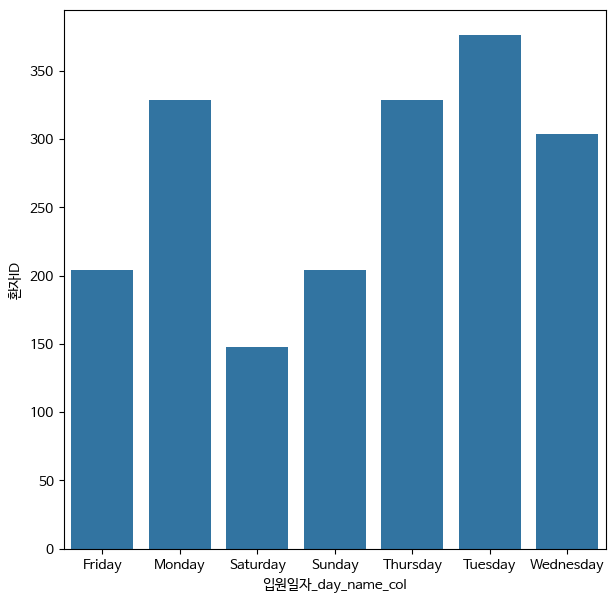

In [68]:
plt.figure(figsize=(7,7))
sns.barplot(data=df_SSL_extracts_in_pivot, x='입원일자_day_name_col', y='환자ID')
plt.show()

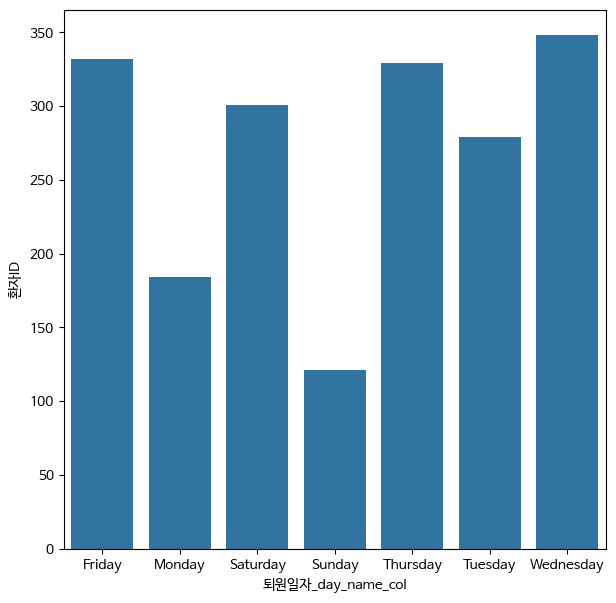

In [69]:
plt.figure(figsize=(7,7))
sns.barplot(data=df_SSL_extracts_out_pivot, x='퇴원일자_day_name_col', y='환자ID')
plt.show()

### 주차 별 환자  입원/퇴원 추이 시각화 및 분석

In [74]:
df_SSL_extracts['입원일자_week'] = df_SSL_extracts['입원일자_date'].dt.week
df_SSL_extracts['퇴원일자_week'] = df_SSL_extracts['퇴원일자_date'].dt.week

<ipython-input-74-6a522ef35122>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_SSL_extracts['입원일자_week'] = df_SSL_extracts['입원일자_date'].dt.week
<ipython-input-74-6a522ef35122>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SSL_extracts['입원일자_week'] = df_SSL_extracts['입원일자_date'].dt.week
<ipython-input-74-6a522ef35122>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_SSL_extracts['퇴원일자_week'] = df_SSL_extracts['퇴원일자_date'].dt.week
<ipython-input-74-6a522ef35122>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [ ]:
df_SSL_extracts

In [76]:
df_SSL_extracts_in_week = pd.pivot_table(data=df_SSL_extracts[['입원일자_week','환자ID']], index='입원일자_week',aggfunc=len)
df_SSL_extracts_out_week = pd.pivot_table(data=df_SSL_extracts[['퇴원일자_week','환자ID']], index='퇴원일자_week',aggfunc=len)
df_SSL_extracts_in_week
df_SSL_extracts_out_week

,환자ID
퇴원일자_week,
1,76
2,56
3,57
4,37
5,82
6,40
7,46
8,40
9,116


In [78]:
df_SSL_extracts_in_week['입원일자_week_col'] = df_SSL_extracts_in_week.index
df_SSL_extracts_in_week
df_SSL_extracts_out_week['퇴원일자_week_col'] = df_SSL_extracts_out_week.index
df_SSL_extracts_out_week

,환자ID,퇴원일자_week_col
퇴원일자_week,,
1,76,1
2,56,2
3,57,3
4,37,4
5,82,5
6,40,6
7,46,7
8,40,8
9,116,9


<Axes: xlabel='입원일자_week_col', ylabel='환자ID'>

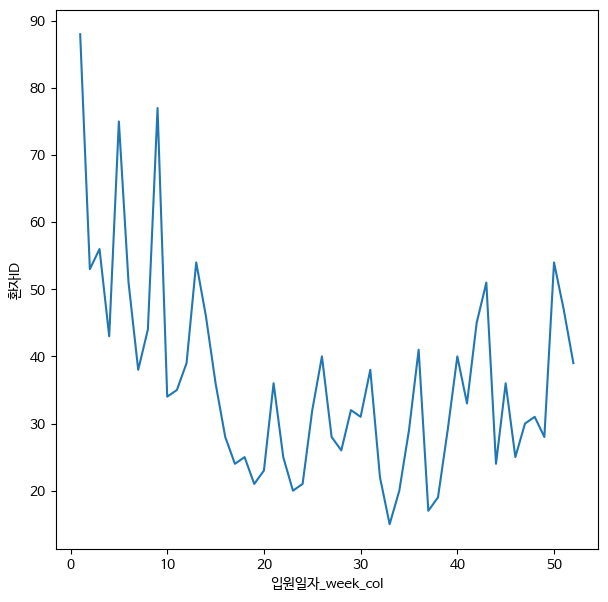

In [83]:
plt.figure(figsize=(7,7))
sns.lineplot(df_SSL_extracts_in_week, x='입원일자_week_col', y='환자ID')

<Axes: xlabel='퇴원일자_week_col', ylabel='환자ID'>

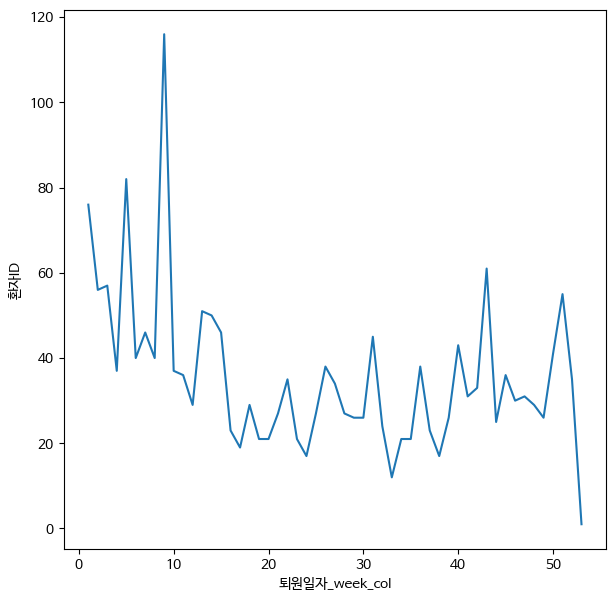

In [84]:
plt.figure(figsize=(7,7))
sns.lineplot(df_SSL_extracts_out_week, x='퇴원일자_week_col', y='환자ID')